# Homework 3: Attractors

In [3]:
from ADMCode import neural
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore")
sns.set(style='white', font_scale=2.6)

%matplotlib inline
# %config InlineBackend.figure_format = 'png'
# %config InlineBackend.savefig.dpi = 150

## **Question 1:**  

**Answer the following questions about the relationship between the system of equations below:**

**Brief description of terms**: The change in the firing rate $r_i$ of a given population $i$ (eq. 1) is computed as a nonlinear function $f(I)$ (eq. 3) of $j$ inputs $I$. Inputs are weighted by connection strengths $w_{i,j}$ (eq. 2). 

$$ d r_i = (-r_i + f(I_i)) \frac{dt}{\tau} + \sigma dW_i $$


$$ I_i = \sum_{j=1}^N w_{i,j} r_j $$


$$f(I) = \frac{r_{max}}{1+e^{-(I-b)/g}}$$


**1a:**: What is the purpose of $f(I)$ (**eq. 3**)?

* **Answer 1a:** 



**1b**: What does **eq. 3** account for that the LCA does not?

* **Answer 1b:** 



**1c**: Is it possible to model decisions involving N>2 alternatives with this model? 

* **Answer 1c:** 


## **Question 2:**  

Use the code cell above to get an intuition for how the $b$ and $g$ parameters influence the nonlinear activation function. 

**2a**: In eq. 3 above, what does the $b$ parameter determine?

* **Answer 2a**


**2b**: In eq. 3 above, what does the $g$ parameter determine?

* **Answer 2b**


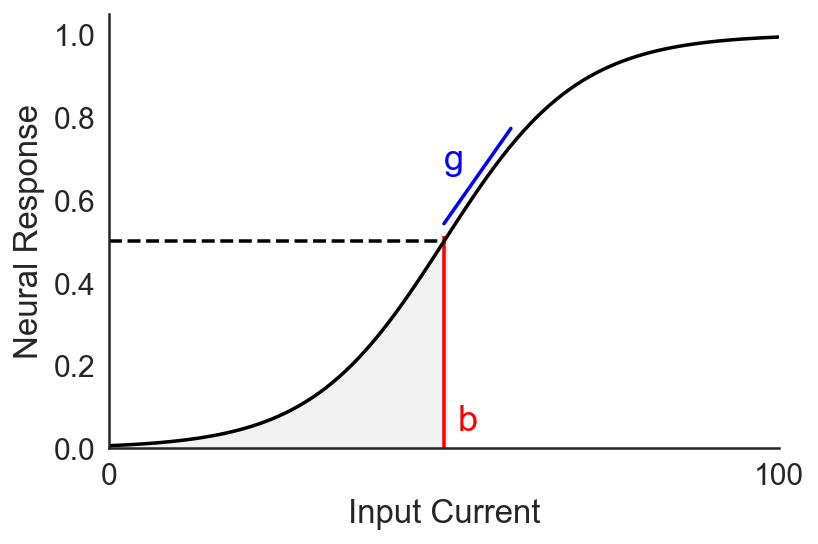

In [9]:
sns.set(style='white', font_scale=1.5)
neural.plot_sigmoid_response(b=50, g=10)

## **Question 3:**  

**Q3**: Describe how the plot in the cell below demonstrates the utility of noise in biological circuits. For help, see *Miller 2015 - Decision-Making Models (Attractors); Figure 7*.

* **Answer 3**: 

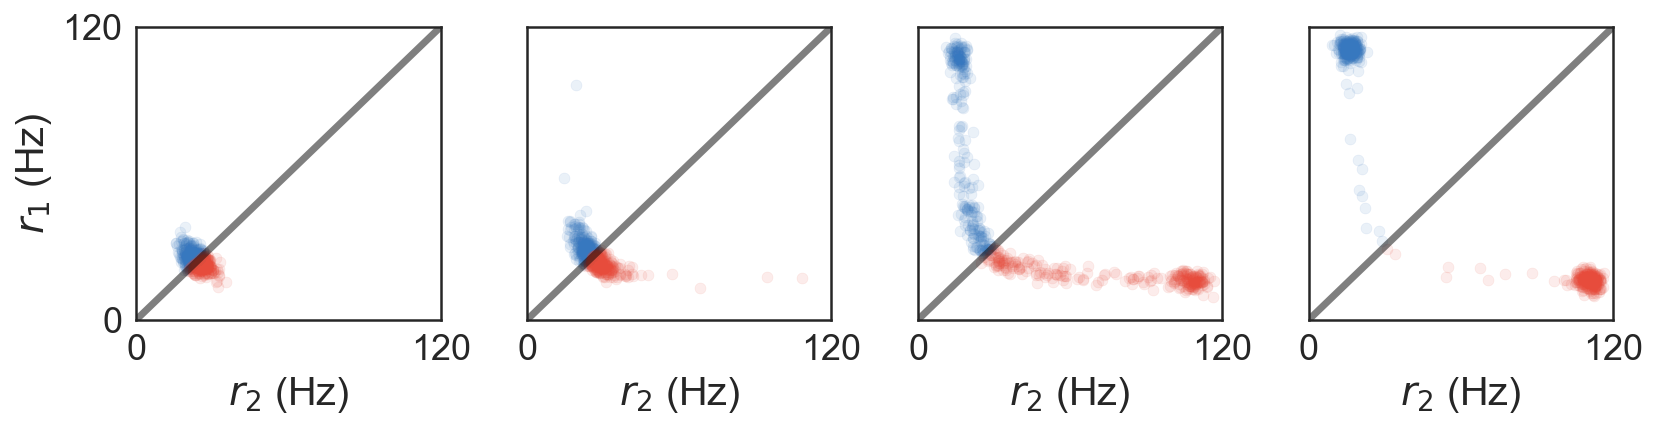

In [87]:
I = [1,5,10,15]
neural.noisy_attractor_endpoints(I=I, si=10, I0=0.01, dt=.005, k=1., B=1., g=20, b=50, ntrials=500)

## **Question 4:**  

**Q4**: The two figures below display the attractor states ($r_1 - r_2$) for varying levels of input $I$ to the two population. Blue lines show how the state of the network evolves when $ I_1 > I_2$, and red lines for $I_1<<I_2$ 

All parameters are held constant across the two simulations *except* the strength of excitatory background input, $I_0$, with the top plot showing the results when $I_0=0$ and the bottom plot showing results for $I_0=10$.

**Q4a**: Explain why the initial state of the network starts closer to the origin (0Hz, 0Hz) in the top figure compared to the bottom figure. 

* **Answer 4a**: 


**Q4b**: In class and lab we discussed how $I_0$ can adjusts the speed-accuracy tradeoff (SAT). Given that increasing $I_0$ from $0$ (top) to $10$ (bottom) causes an upwards shift in the initial state of the network, what is likely to happen to the speed and accuracy of behavior in the bottom plot compared to when $I_0$ is 0. (note, there is not necessarily a single right answer, I'm looking more for consistent logic in your reasoning)

* **Answer 4b**: 

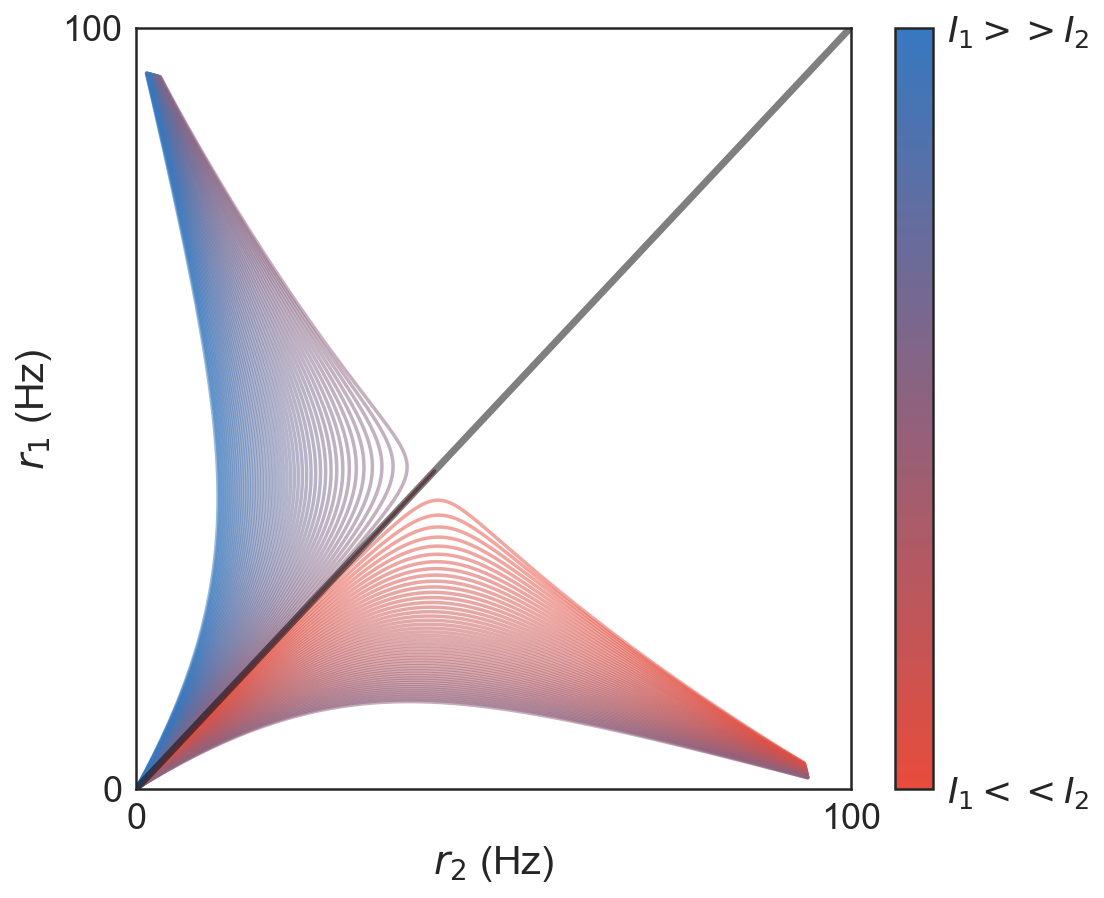

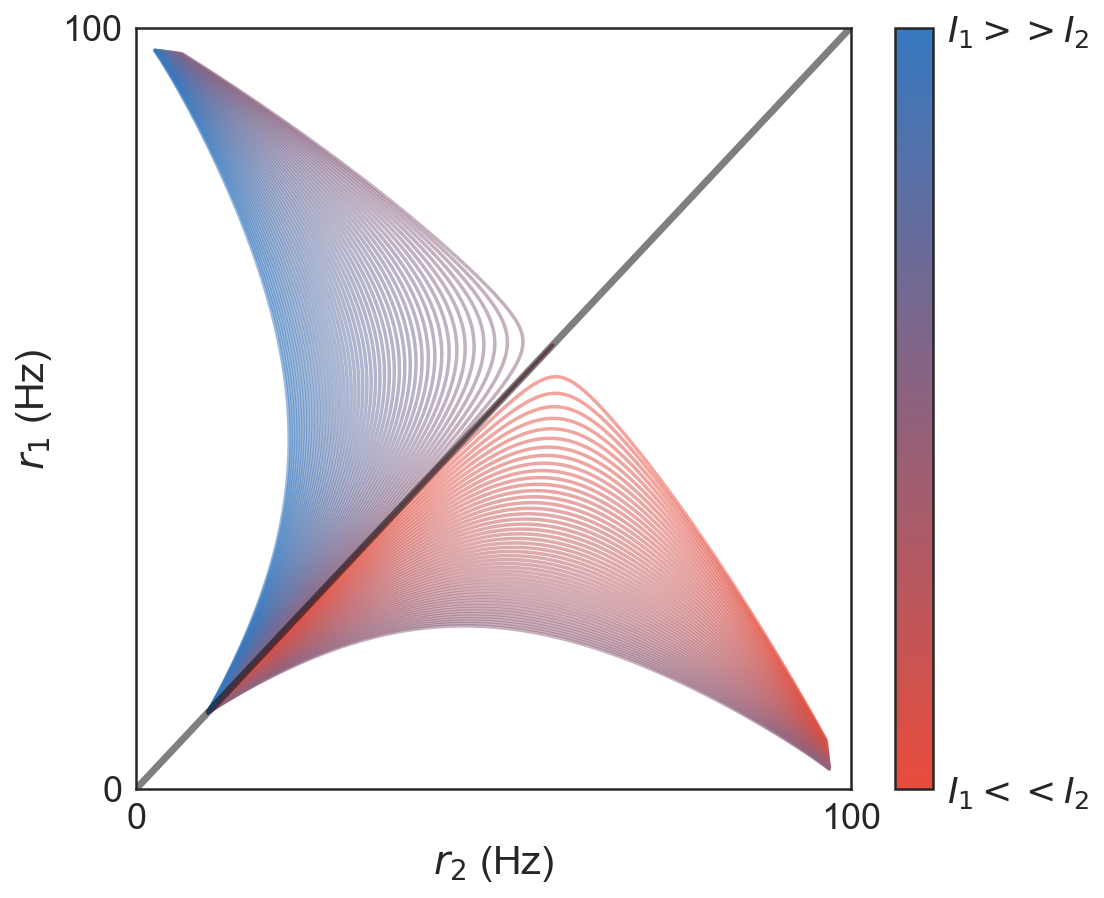

In [75]:
I0a=0
I0b=10

neural.simulate_attractor_competition(Imax=25, I0=I0a, k=.5, B=.5, si=0, ntrials=100)
neural.simulate_attractor_competition(Imax=25, I0=I0b, k=.5, B=.5, si=0, ntrials=100)

In [ ]:
def attractor_network(I1=6, I2=3, I0=2, k=.85, B=.28, si=.3, rmax=50, b=30, g=9, Z=20, dt=.001, tau=.05, tmax=1.5):
    """ function for simulating a two-state attractor network
    Model parameters:
        I1: Input stregth (choice 1)
        I2: Input stregth (choice 2)
        I0: Background excitabiltiy (shared across all i)
        k: recurrent excitation (self inputs)
        B: cross inhibition ($B<0$)
        Z: shared threshold

    Additional arguments:
        dt: timestep
        tau: time constant
        si: noise scalar
        rmax: max firing rate 
        b: sigmoid activation bias
        g: sigmoid acitivation gain
    """

    timepoints = np.arange(0, tmax, dt)
    ntime = timepoints.size

    r1 = np.zeros(ntime)
    r2 = np.zeros(ntime)
    dv = np.zeros(ntime)

    NInput = lambda x, r: rmax/(1+np.exp(-(x-b)/g))-r
    E1=si*np.sqrt(dt/tau)*rs(ntime)
    E2=si*np.sqrt(dt/tau)*rs(ntime)

    onset=100
    r1[:onset], r2[:onset] = [v[0][:onset] + I0+v[1][:onset] for v in [[r1,E1],[r2,E2]]]

    subZ=True
    for i in range(onset, ntime):
        r1[i] = r1[i-1] + dt/tau * (NInput(I1 + I0 + k*r1[i-1] + -B*r2[i-1], r1[i-1])) + E1[i]
        r2[i] = r2[i-1] + dt/tau * (NInput(I2 + I0 + k*r2[i-1] + -B*r1[i-1], r2[i-1])) + E2[i]
        dv[i] = (r1[i]-r2[i])/np.sqrt(2)
        if np.abs(dv[i])>=Z:
            rt = i+1
            return r1[:i+1], r2[:i+1], dv[:i+1], rt
    rt = i+1
    return r1[:i], r2[:i], dv[:i], rt
